In [1]:
import os
import sys
sys.path.append("..")  # add top folder to path

from pathlib import Path

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tinymolecule.utils.docking import generate_logs_table

### Get binding affinity data from docked training molecules

In [2]:
logs_ccr5_train = generate_logs_table(Path("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/train/logs/"))
logs_ccr5_train.head()

,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,affin_kcal_mol-1_10,...,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10,base64_id
0,-10.3,-9.8,-9.7,-9.5,-9.5,-9.2,-8.9,-8.6,-8.5,-8.5,...,5.575,2.095,5.751,10.261,10.022,11.226,5.212,11.500,6.608,42787967
1,-8.6,-8.1,-8.0,-7.9,-7.6,-7.1,-7.1,-7.1,-7.0,-6.8,...,1.970,7.095,6.661,7.556,5.339,6.404,7.121,6.357,4.201,ec3a697f
2,-10.8,-10.7,-10.6,-10.5,-10.4,-10.4,-10.1,-10.0,-9.9,-9.8,...,8.577,7.780,8.590,8.227,8.906,2.164,7.491,9.353,9.644,4d399c53
3,-7.8,-7.5,-7.5,-7.4,-7.3,-7.3,-7.0,-7.0,-6.9,-6.7,...,6.775,6.937,2.214,2.089,6.986,6.692,6.518,8.039,7.624,3b334b71
4,-9.9,-9.7,-9.3,-9.2,-9.2,-9.0,-9.0,-9.0,-8.9,-8.8,...,2.212,6.205,8.423,6.529,2.167,5.266,4.383,3.022,10.452,f5d1566d


### Reverse-map docked molecules to SMILES code

In [4]:
ccr5_train = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/gen/ccr5_ic50_train.csv")
ccr5_train = ccr5_train[ccr5_train["base64_id"].isin(logs_ccr5_train["base64_id"])].reset_index(drop=True)
ccr5_train.head()

,Unnamed: 0,Unnamed: 0.1,SMILES,base64_id
0,3,3,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,47f01acf
1,25,25,Cc1nc(-c2ccccc2)nc(C)c1C(=O)N1CCC(C)(N2CCC(N(c...,94569a84
2,26,26,Cc1nc(-c2ccccc2)nc(C)c1C(=O)N1CCC(C)(N2CCC(N(c...,94569a84
3,27,27,Cc1nc(-c2ccccc2)nc(C)c1C(=O)N1CCC(C)(N2CCC(N(c...,94569a84
4,28,28,Cc1nc(-c2ccccc2)nc(C)c1C(=O)N1CCC(C)(N2CCC(N(c...,94569a84


### Fetch molecules corresponding to the SMILES code

In [5]:
ccr5_train_meta = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/ccr5_ic50_meta.csv")
ccr5_train_meta.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,335.0
1,NaN,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,28.0
2,NaN,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,10.0
3,NaN,76739,[],CHEMBL873385,Binding affinity against human CCR5 receptor s...,B,BAO_0000190,BAO_0000219,cell-based format,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,35.0
4,NaN,77749,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,15.0


In [6]:
ccr5_train_meta = ccr5_train_meta[ccr5_train_meta["canonical_smiles"].isin(ccr5_train["SMILES"])].reset_index(drop=True)
ccr5_train_meta.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,76739,[],CHEMBL873385,Binding affinity against human CCR5 receptor s...,B,BAO_0000190,BAO_0000219,cell-based format,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,35.0
1,NaN,105925,[],CHEMBL654035,Antagonistic activity against human C-C chemok...,F,BAO_0000190,BAO_0000019,assay format,Cc1nc(-c2ccccc2)nc(C)c1C(=O)N1CCC(C)(N2CCC(N(c...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,8.5
2,NaN,105928,[],CHEMBL656492,Antagonistic activity against monkey C-C chemo...,F,BAO_0000190,BAO_0000019,assay format,Cc1nc(-c2ccccc2)nc(C)c1C(=O)N1CCC(C)(N2CCC(N(c...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,23.0
3,NaN,105930,[],CHEMBL840572,Rises in intracellular [Ca2+] levels by using ...,F,BAO_0000190,BAO_0000219,cell-based format,Cc1nc(-c2ccccc2)nc(C)c1C(=O)N1CCC(C)(N2CCC(N(c...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,31.0
4,NaN,105932,[],CHEMBL842384,Migration of compound was evaluated in cell mi...,F,BAO_0000190,BAO_0000219,cell-based format,Cc1nc(-c2ccccc2)nc(C)c1C(=O)N1CCC(C)(N2CCC(N(c...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,16.5


### Merge IC50 with table of binding affinities

In [7]:
ccr5_train_meta_sub = ccr5_train_meta[["standard_value", "canonical_smiles"]].rename(columns={"canonical_smiles" : "SMILES", "standard_value": "ic50_nM"})

# merge based on SMILES
_ = pd.merge(ccr5_train_meta_sub, ccr5_train, on="SMILES")

# merge based on unique id
baff_ic50_ccr5 = pd.merge(_, logs_ccr5_train, on="base64_id")
baff_ic50_ccr5.dropna(inplace=True)
baff_ic50_ccr5.head()

,ic50_nM,SMILES,Unnamed: 0,Unnamed: 0.1,base64_id,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,...,best_dist_rmsd_ub_1,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10
0,35.0,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,3,3,47f01acf,-11.1,-10.6,-10.5,-10.3,-10.2,...,0.0,8.625,9.581,8.791,7.081,9.465,3.107,9.156,9.619,6.146
1,35.0,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,165,165,47f01acf,-11.1,-10.6,-10.5,-10.3,-10.2,...,0.0,8.625,9.581,8.791,7.081,9.465,3.107,9.156,9.619,6.146
2,35.0,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,632,632,47f01acf,-11.1,-10.6,-10.5,-10.3,-10.2,...,0.0,8.625,9.581,8.791,7.081,9.465,3.107,9.156,9.619,6.146
3,35.0,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,706,706,47f01acf,-11.1,-10.6,-10.5,-10.3,-10.2,...,0.0,8.625,9.581,8.791,7.081,9.465,3.107,9.156,9.619,6.146
4,35.0,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,777,777,47f01acf,-11.1,-10.6,-10.5,-10.3,-10.2,...,0.0,8.625,9.581,8.791,7.081,9.465,3.107,9.156,9.619,6.146


## Time to plot!

<Figure size 660x660 with 0 Axes>

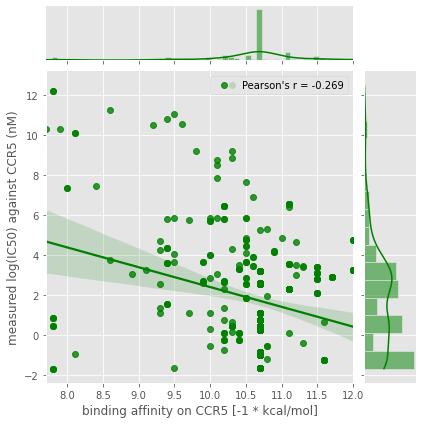

In [18]:
plt.figure(figsize=(2, 2), dpi=330)

x = baff_ic50_ccr5["affin_kcal_mol-1_1"] * (-1)
y = np.log(baff_ic50_ccr5["ic50_nM"])
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="green")

plt.xlabel(f"binding affinity on CCR5 [-1 * kcal/mol]")
plt.ylabel(f"measured log(IC50) against CCR5 (nM)")
plt.legend()
plt.show()

### Comparing IC50 to average binding affinity
Since IC50 is a property calculated in an assay over many proteins, it makes sense to consider the average case binding affinity rather than the bestest case.

<Figure size 660x660 with 0 Axes>

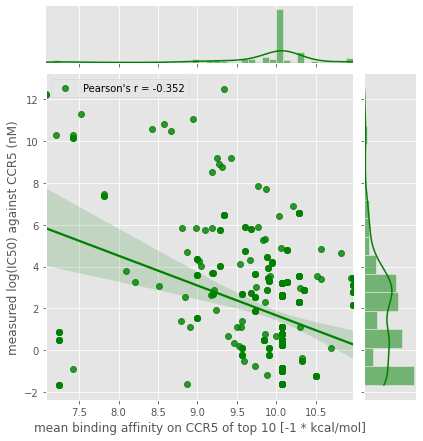

In [26]:
plt.figure(figsize=(2, 2), dpi=330)

all_baff = pd.concat([baff_ic50_ccr5[f"affin_kcal_mol-1_{i}"] for i in range(1, 11)], axis=1)
x = all_baff.mean(axis=1) * (-1)
y = np.log(baff_ic50_ccr5["ic50_nM"])
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="green")

plt.xlabel(f"mean binding affinity on CCR5 of top 10 [-1 * kcal/mol]")
plt.ylabel(f"measured log(IC50) against CCR5 (nM)")
plt.legend()
plt.show()
